# Starbucks Survey


[Link to information source](https://www.kaggle.com/mahirahmzh/starbucks-customer-retention-malaysia-survey?select=Starbucks+satisfactory+survey+encode+cleaned.csv)

### presenter :
Aviram Klaiman

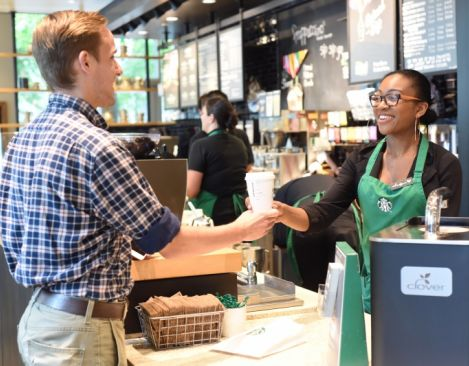

In [1]:
from IPython import display
from IPython.display import Image


display.Image('https://stories.starbucks.com/wp-content/uploads/2019/01/Ao6m3dho-7360-4912.jpg')

#### Data Keys:
+ gender:

     **0**: Male; **1**: Female
+ age: 

     **0**: Below 20; **1**: 20-29; **2**: 30-39; **3**: 40 and above
+ status:

     **0**: Student; **1**: Self-Employed; **2**: Employed; **3**: Housewife
+ income (in Malaysian Ringgit):

     **0**: Less than 25,000; **1**: 25,000–50,000; **2**: 50,000–100,000; **3**: 100,000–150,000; **4**: More than 150,000
+ visitNo:

     **0**: Daily; **1**: Weekly; **2**: Monthly; **3**: Rarely
+ timeSpend:
   
   **0**: Below 30 min; **1**: 30 min - 1 hr; **2**: 1hr - 2hr; **3**: 2hr - 3hr; **4**: Above 4 hrs
+ spendPurchase:

    **0**: 0; **1**: Less then 20 RM; **2**: 20 RM - 40 RM; **3**: More then 40 RM
+ loyal:

    **0**: Yes; **1**: No
+ membershipCard:

    **0**: Yes; **1**: No

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/idokapel/project/main/Starbucks%20satisfactory%20survey%20encode%20cleaned%20(1).csv'

In [4]:
strbks_df = pd.read_csv(url)

In [5]:
strbks_df.columns

Index(['Id', 'gender', 'age', 'status', 'income', 'visitNo', 'method',
       'timeSpend', 'location', 'membershipCard', 'itemPurchaseCoffee',
       'itempurchaseCold', 'itemPurchasePastries', 'itemPurchaseJuices',
       'itemPurchaseSandwiches', 'itemPurchaseOthers', 'spendPurchase',
       'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate',
       'serviceRate', 'chooseRate', 'promoMethodApp', 'promoMethodSoc',
       'promoMethodEmail', 'promoMethodDeal', 'promoMethodFriend',
       'promoMethodDisplay', 'promoMethodBillboard', 'promoMethodOthers',
       'loyal'],
      dtype='object')

Finding all the columns that have 'Rate':

In [6]:
rate_colls = [col for col in strbks_df.columns if 'Rate' in col]
rate_colls

['productRate',
 'priceRate',
 'promoRate',
 'ambianceRate',
 'wifiRate',
 'serviceRate',
 'chooseRate']

Changing the rates values to 1- Bad, 3- OK,5- Good:

In [7]:
for r in rate_colls:
    strbks_df[r] = strbks_df[r].replace([1,2,3,4,5],[1,1,3,5,5])

Finding the relevant columns to work with:

In [8]:
cus_details = ['gender','age','status','income','visitNo','method','timeSpend','location','spendPurchase','membershipCard','loyal']
features = cus_details + rate_colls
features

['gender',
 'age',
 'status',
 'income',
 'visitNo',
 'method',
 'timeSpend',
 'location',
 'spendPurchase',
 'membershipCard',
 'loyal',
 'productRate',
 'priceRate',
 'promoRate',
 'ambianceRate',
 'wifiRate',
 'serviceRate',
 'chooseRate']

Finding correlations from the data:

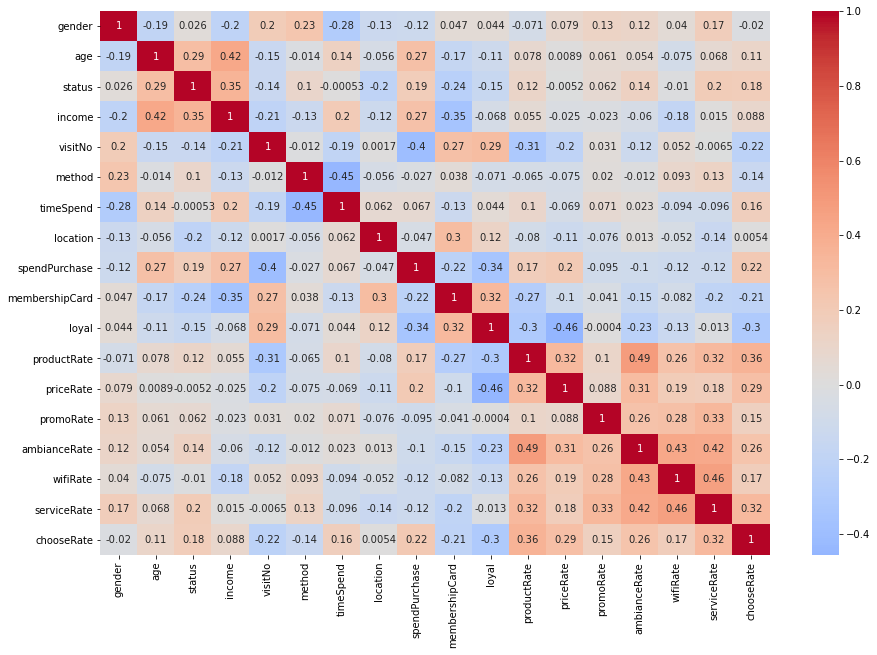

In [9]:
corrs = strbks_df[features].corr(method = 'kendall')
plt.figure(figsize=(15,10))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

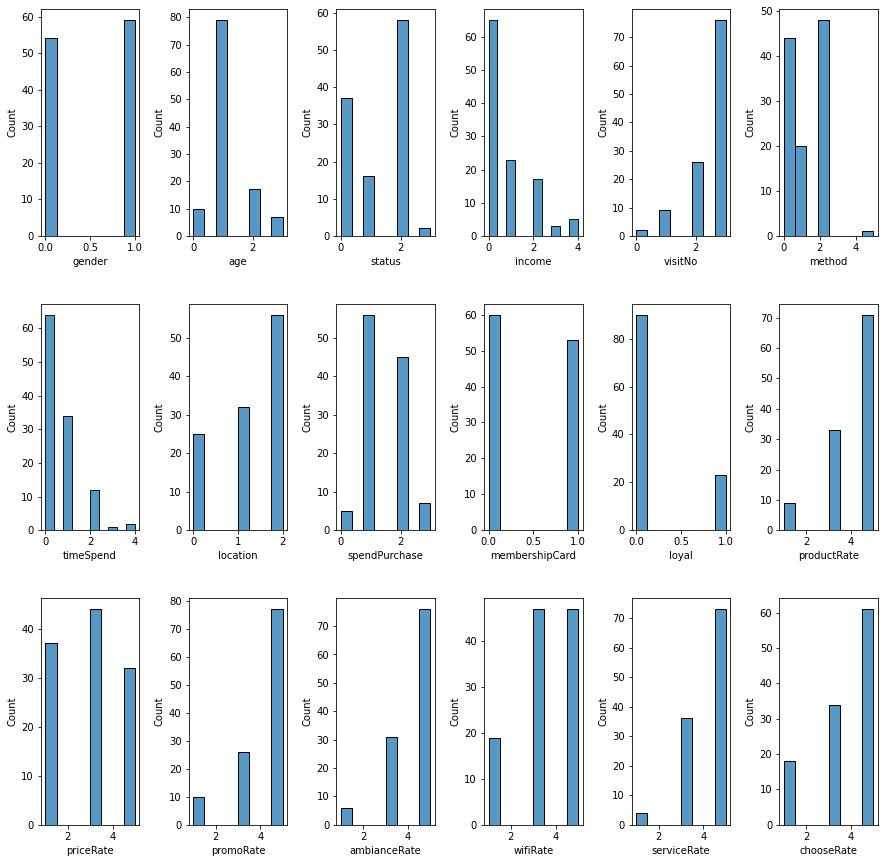

In [10]:
fig, axes = plt.subplots(3,6,figsize=(15,15))
plt.subplots_adjust(wspace=0.5, hspace = 0.3)
axes = axes.flatten()
for i,att in enumerate(features):
    sns.histplot(x=att, data=strbks_df,  ax=axes[i])

Let's check what does loyal mean:

<AxesSubplot:xlabel='loyal', ylabel='visitNo'>

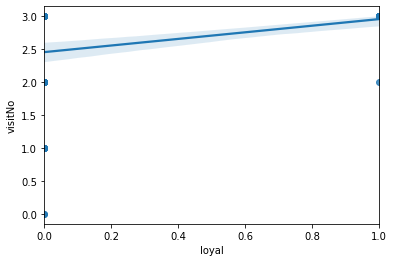

In [11]:
sns.regplot(data=strbks_df, x='loyal', y='visitNo')

> According to Starbucks website, the loyalty program gives the customers earning points on every buy, and by collecting them, they get rewards.

<AxesSubplot:xlabel='membershipCard', ylabel='visitNo'>

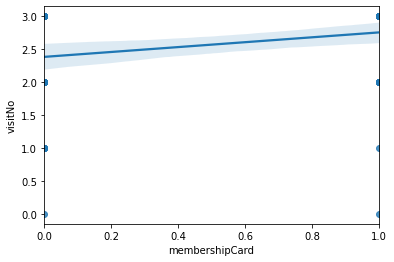

In [12]:
sns.regplot(data=strbks_df, x='membershipCard', y='visitNo')

There's a weak connection between the loyalty and membership card to the visit number,

customers that have a membership card or loyalty points tend to come a little more often then the customers that don't have.

## Note: 
>    Our data is discrete so it's hard to visualize the data by regression plot, so we'll use other techniques.

#### Let's try to check how much customers with membership cards or loyalty program usually spend:

In [13]:
purchase_df = strbks_df.copy()
purchase_df['spendPurchase'] = purchase_df['spendPurchase'].replace([0,1,2,3],['Less then 20','Less then 20','More then 20','More then 20'])
purchase_df = purchase_df[(purchase_df['membershipCard'] == 0) | (purchase_df['loyal'] == 0)]

<AxesSubplot:ylabel='spendPurchase'>

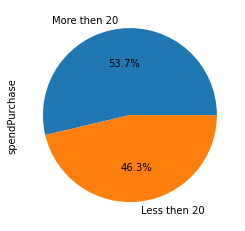

In [14]:
purchase_df['spendPurchase'].value_counts().plot.pie(autopct='%1.1f%%')

---
>#### Observation:
> We can understand that the membership card and the loyalty points don't really make customers spend more money, or visit more,
> 
>so there is no actual use to invest at this channel.
---

<AxesSubplot:xlabel='gender', ylabel='count'>

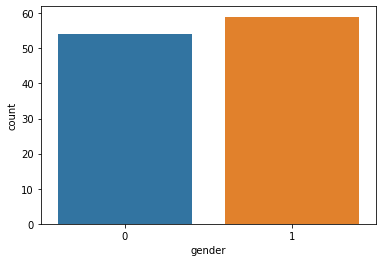

In [15]:
sns.countplot(x='gender', data= strbks_df)

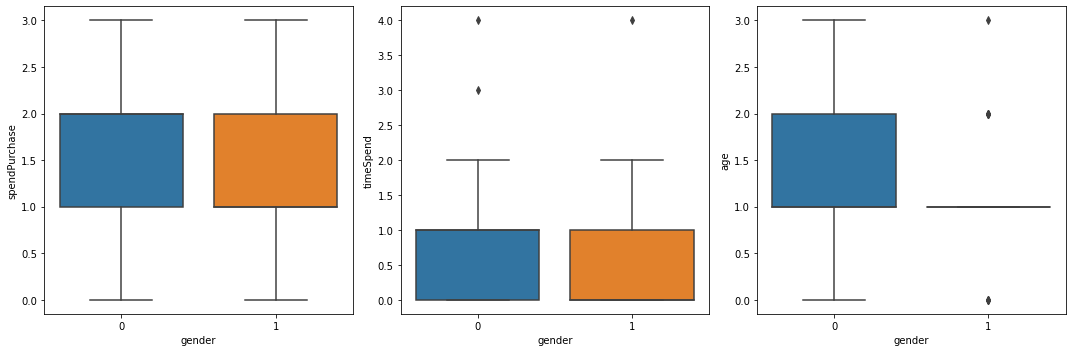

In [16]:
fig, axes = plt.subplots(figsize=(15,5), ncols=3)
sns.boxplot(ax=axes[0], x='gender', y='spendPurchase', data=strbks_df)
sns.boxplot(ax=axes[1], x='gender', y='timeSpend', data=strbks_df)
sns.boxplot(ax=axes[2], x='gender', y='age', data=strbks_df)
for i, ax in enumerate(fig.axes):
    axes[i].tick_params(axis='x')
plt.tight_layout()
plt.show()

---
>#### Observation:
> The number of male and female customers are quite similar, also the money they spend and the time they spend.
>
> So we can enlarge the female customers age range.
---

<AxesSubplot:ylabel='status'>

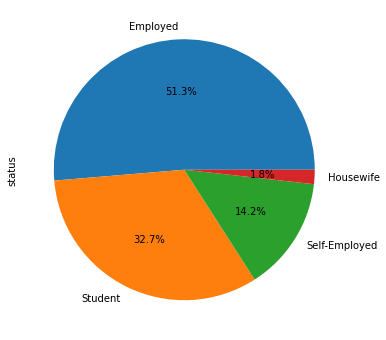

In [17]:
strbks_df['status'].replace([0,1,2,3],['Student','Self-Employed','Employed','Housewife']).value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6))

House wifes are not the target customers that we're looking for.

About 33% of the customers are students.

#### Lets see what we can learn from the status of the customer and his visits:

<AxesSubplot:xlabel='status', ylabel='visitNo'>

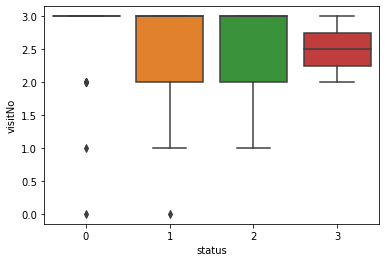

In [18]:
sns.boxplot(x='status', y='visitNo', data=strbks_df)

We can see that Students don't come very often

<AxesSubplot:xlabel='status', ylabel='spendPurchase'>

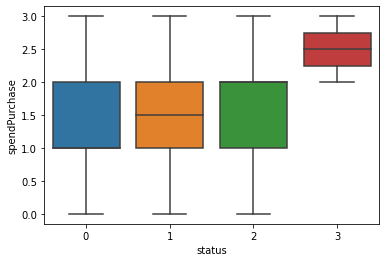

In [19]:
sns.boxplot(x='status', y='spendPurchase', data=strbks_df)

But they are spending the same amount of money when they do


<AxesSubplot:xlabel='status', ylabel='priceRate'>

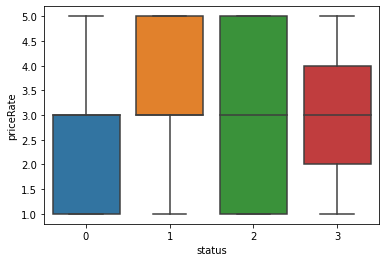

In [20]:
sns.boxplot(data=strbks_df, x='status', y='priceRate')

These are the students features:

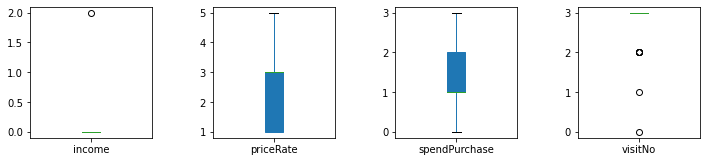

In [21]:
students_df = strbks_df[strbks_df['status'] == 0]
relevant = ['income','priceRate','spendPurchase','visitNo',]
students_df[relevant].plot(subplots=True, layout=(5,4), kind='box' , figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

![display image](https://i.gifer.com/1I0z.gif)


---

> #### Observation:
> Students rate the prices as bad, and their income is very low, which makes them come rarely.
> But when they do come, they spend as much as the other groups.
>
> So, to enlarge the number of students customers, and therefore to increase profits, 
> we suggest to give a student discount that will make them want to come more often.

---

#### Now, let's see what we can learn from the customer's age:

<AxesSubplot:ylabel='age'>

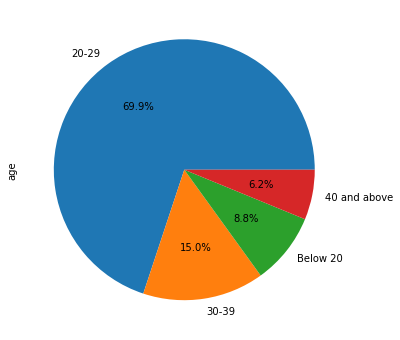

In [22]:
strbks_df['age'].replace([0,1,2,3],['Below 20','20-29','30-39','40 and above']).value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6))

Most of our customers are 20-29 years old.

Checking the 40+ group:

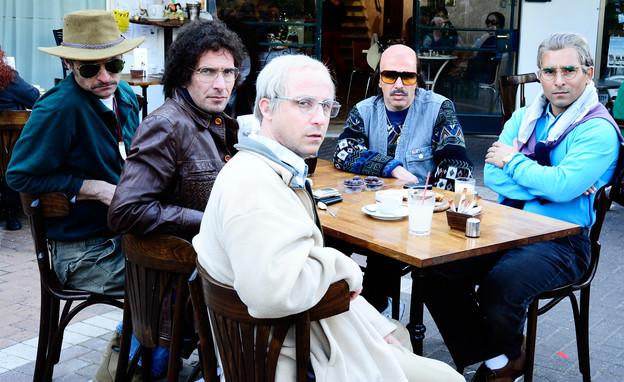

In [23]:
display.Image('https://img.mako.co.il/2013/10/03/parlament_1920X1080_i.jpg')

In [24]:
age_df = strbks_df[strbks_df['age'] == 3]

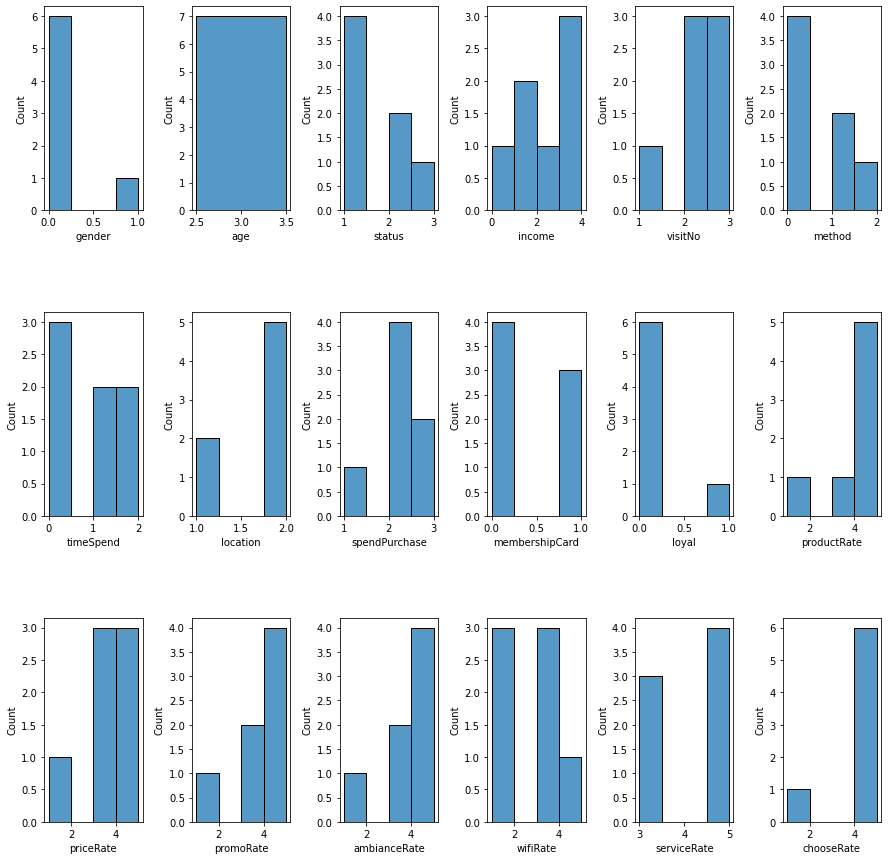

In [25]:
fig, axes = plt.subplots(3,6,figsize=(15,15))
plt.subplots_adjust(wspace=0.5, hspace = 0.5)
axes = axes.flatten()
for i,att in enumerate(features):
    sns.histplot(x=att, data=age_df,  ax=axes[i])

<AxesSubplot:xlabel='age', ylabel='timeSpend'>

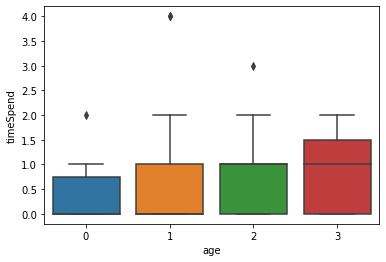

In [26]:
sns.boxplot(data=strbks_df, x='age', y='timeSpend')

The 40+ group spends a little more time at their visits then others.

<AxesSubplot:xlabel='age', ylabel='spendPurchase'>

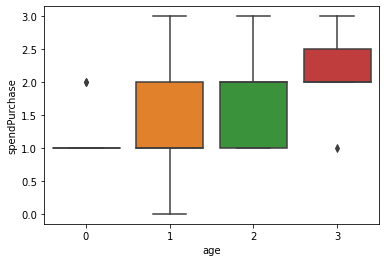

In [27]:
sns.boxplot(data=strbks_df, x='age', y='spendPurchase')

Customers above 40 years old tend to spend more money per visit

<AxesSubplot:xlabel='age', ylabel='wifiRate'>

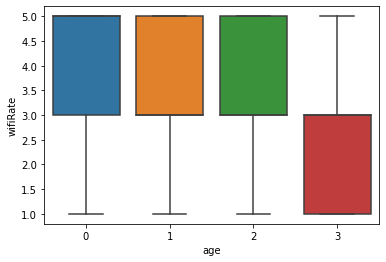

In [28]:
sns.boxplot(data=strbks_df, x='age', y='wifiRate')

---
>#### Observation:
> Most of the customers are young, between 20-29 years old.
> 
> The group that spends the most at visit is the 40+ group, and they ranked the wifi the worst.
>
> Perhaps upgrading the wifi will make them come more.
---

![display image](https://nationalcoffeeblog.files.wordpress.com/2016/09/coffee-wink.gif?w=354&h=265)
